<a href="https://colab.research.google.com/github/Requenamar3/Machine-Learning/blob/main/CAP_4633C_Spring_2025__ASSIGNMENT_1_Group_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

●	This assignment covers the basic ideas about Classification we have discussed so far in class. It also covers Naive Bayes classification and ClassificationTrees.

●	Questions 1 and 2 are challenge questions. They are worth only 5 and 15 points, respectively. Challenge questions are those I want you to try your best to answer without getting any help from me (i.e., you cannot ask me how to answer them). If you do something, you will get points for your answers to these questions, even if they are not completely right (i.e., partial credit is your friend!)

●	Questions 3 and 4 are based on the Cancer dataset part of scikit-learn. To know more about the variables in this dataset, you can visit the following web page:

---

---
# **Question 1 (5 points):**

(include the answer to this question in the notebook too)

We have two piles of product X.
---
The probability that one product selected from pile # 1 is defective is 0.2.
---
The probability that one product selected from pile # 2 is defective is 0.1.
---

## a) We inspect an item that was previously drawn from a pile (we do not know which pile) and we notice it is defective. What is the probability it was selected from pile 2? Show all your work.
---

In [ ]:
0.1/0.2


0.5

P(Pile 1) = 0.5

P(Pile 2) = 0.5

P(Defective|Pile 1) =0.2

P(Defective|Pile 2) = 0.1

## b) Describe with words what these two statements mean:


P(Defective|Pile 1) =0.2

P(Defective|Pile 2) = 0.1



 what is the probability that the target or the outcome takes on different values knowing the values of the predictors

P (Pile 2 | Non- defective)

P(Y|X) = P(X|Y) P (Y)
        ______________
            P(X)   


what is the probability that the target or the outcome  takes on different values given the values of the predictors

or knowing the values of the predictors. we can get that applying bates rules because is too hard to predict. naives bayes makes a simplistic assumtion and using this assumption which makes it easier to predict

y is the target

---
# **Question 2 (15 points):**
 (include the answer to this question in the notebook too)

The following figure shows a split done on predictor Xj at a cut off value of a.



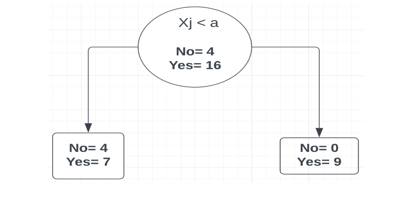

## a) Manually compute the error rate of the split (show all your work).


## a1) Based on the error rate of the split, decide whether the node should be split into two child nodes or left unsplit. Justify.


## b) Manually compute the entropy of the split (show all your work).  


## b1) Based on the entropy of the split, decide whether the node should be split into two child nodes or left unsplit. Justify.

---

In [ ]:
# Import the datasets module from scikit-learn
from sklearn import datasets

# Load the breast cancer dataset from scikit-learn
cancer_data = datasets.load_breast_cancer()

# Convert the dataset into a Pandas DataFrame with feature names as column names
cancer_df = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)

# Extract the original target labels (0 for malignant, 1 for benign)
original_target = cancer_data.target

# Reverse the target labels (1 becomes 0, and 0 becomes 1)
new_target = 1 - original_target

# Add the modified target labels as a new column 'Y' in the DataFrame
cancer_df['Y'] = new_target


https://scikit-learn.org/stable/datasets/toy_dataset.html


Now you can use the ‘cancer_df’ data frame to answer questions 3 and 4. In this dataframe, the last column, Y, is the outcome. The other columns are the predictors. The classes of the outcome variable are 1 for patients with Malignant tumors and 0 for patients with benign tumors.

Note: I strongly advised you to read the dataset using the code I provided you above. If you try to use your own code and get the labels of Y wrong, you will be deducted 15 points for making such an AVOIDABLE mistake. If that situation happens, the explanation for why you lost the 15 points will be to show you this fragment.



In [ ]:
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation
import matplotlib.pyplot as plt  # For data visualization

# Importing necessary modules from scikit-learn
from sklearn.model_selection import train_test_split, GridSearchCV, KFold  # For model selection and tuning
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve  # For model evaluation
from sklearn.tree import DecisionTreeClassifier  # Importing DecisionTreeClassifier for building the decision tree model
from sklearn import tree  # Importing tree module for visualization and analysi

In [ ]:
cancer_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

---
# **Question 3 (50 points):**

Obtain a classification tree to estimate the outcome variable in the Cancer dataset. Use the post-pruning strategy based on cost-complexity pruning via cross-validation.
---
Consider the following requirements before applying the post-pruning strategy:
---

●	You MUST use the exact same steps and code that we learned in class. If you do something differently, your question will be marked wrong with the following message: “Intentionally failed to adhere to instructions”.

●	Split the data into 80% training and 20% testing.

●	Use Entropy as the criterion to grow the tree.



In [ ]:
x_all = cancer_df.drop('Y', axis=1)
y_cancer = cancer_df['Y']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_all, y_cancer, test_size=0.2, random_state=1, stratify= y_cancer)

In [ ]:
# Creating an unpruned Decision Tree model using 'gini' criterion
tree_cancer_unpruned = DecisionTreeClassifier(criterion='entropy', random_state=1)

# Train the unpruned decision tree
tree_cancer_unpruned.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [ ]:
ccp_path = tree_cancer_unpruned.cost_complexity_pruning_path(x_train, y_train)


In [ ]:
hyperparam_grid_alpha = {'ccp_alpha': ccp_path.ccp_alphas}

In [ ]:
# Set up cross-validation with 10 splits, shuffling the data for randomness
cv_set_up = KFold(n_splits=10, shuffle=True, random_state=1)

In [ ]:
# Perform GridSearchCV to find the best alpha value for pruning
gridSearch_alpha= GridSearchCV(
    tree_cancer_unpruned,
    param_grid=hyperparam_grid_alpha,
    cv=cv_set_up,  # Use cross-validation setup
    scoring='accuracy'  # Optimize for accuracy
)

# Fit the grid search on the training data
gridSearch_alpha.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=1),
             param_grid={'ccp_alpha': array([0.        , 0.00713212, 0.00995456, 0.00995456, 0.01066979,
       0.01066979, 0.01138587, 0.01262863, 0.01426423, 0.01833523,
       0.02557741, 0.04816423, 0.08031437, 0.09160626, 0.56608836])},
             scoring='accuracy')

In [ ]:
# Print the best alpha parameter found
print('The best parameters are:', gridSearch_alpha.best_params_)

The best parameters are: {'ccp_alpha': 0.02557740823854459}


In [ ]:
# Train a post-pruned decision tree using the best alpha value
tree_cancer_postpruned = DecisionTreeClassifier(
    random_state=1,
    ccp_alpha=gridSearch_alpha.best_params_['ccp_alpha']  # Apply best alpha for pruning
)

# Fit the pruned decision tree on the training data
tree_cancer_postpruned.fit(x_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.02557740823854459, random_state=1)


## a) Obtain the tree on the training data and show its figure. Use the figure of the tree to answer these two questions:


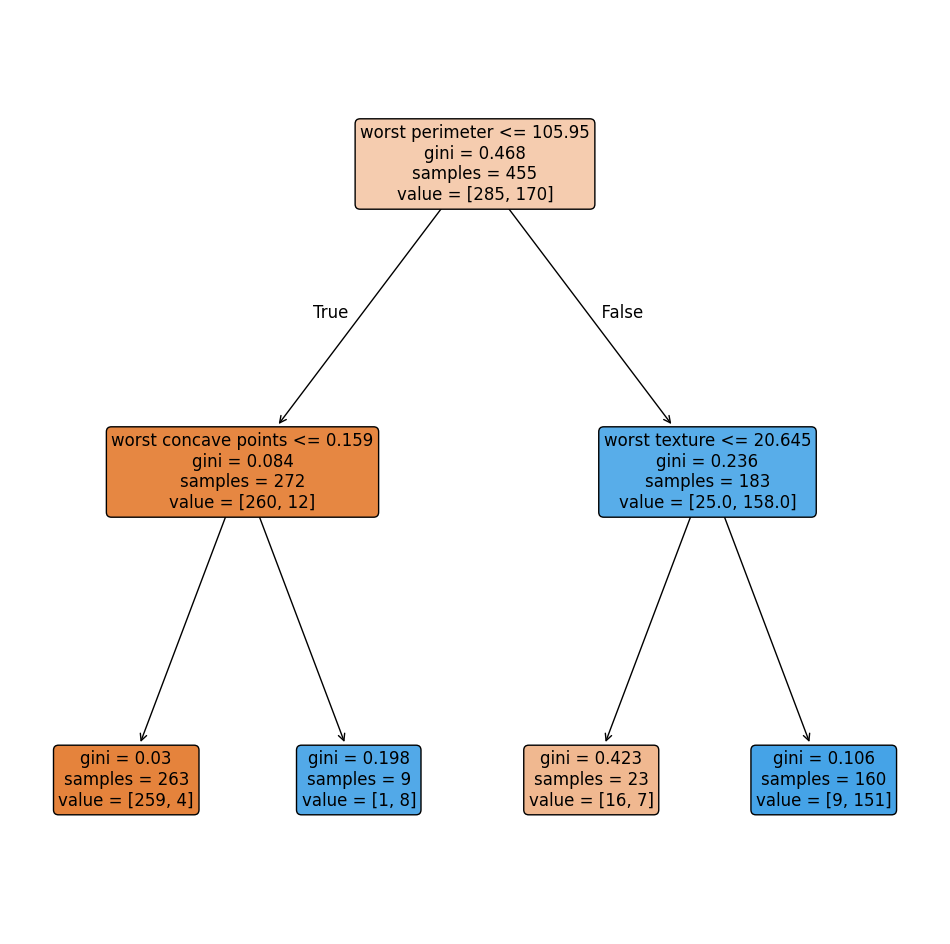

In [ ]:
# Plot the pruned decision tree
plt.figure(figsize=(12, 12))  # Set figure size
tree.plot_tree(
    tree_cancer_postpruned,
    filled=True,  # Fill nodes with color
    rounded=True,  # Round node edges
    feature_names=x_train.columns,  # Label nodes with feature names
    fontsize=12  # Set font size for readability
)
plt.show()  # Display the tree



From the rightmost leaf in the tree:

●	Report the number of observations that reached it.

**There are 160 observations in the rightmost leaf**

●	What’s the prediction of Y for the samples that reached it? JUSTIFY how you came up with your prediction.

**The prediction of Y is class 1**.

 Justification: The decision tree assigns the most frequent class in each leaf node as the predicted class. In this case, 151 out of 160 samples belong to class 1, making it the majority class.

## b) Report the test prediction error rate of the tree that you obtained.


In [ ]:
y_pred_postpruned = tree_cancer_postpruned.predict(x_test)

In [ ]:
# Convert the confusion matrix into a DataFrame for better readability
conf_mattrix = pd.DataFrame(
    confusion_matrix(y_test, y_pred_postpruned),
    index=['Actual_No', 'Actual_Yes'],  # Row labels for actual values
    columns=['Pred_No', 'Pred_Yes']  # Column labels for predicted values
)

# Display the confusion matrix DataFrame
conf_mattrix

,Pred_No,Pred_Yes
Actual_No,69,3
Actual_Yes,4,38


In [ ]:
print(classification_report(y_test, y_pred_postpruned))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95        72
           1       0.93      0.90      0.92        42

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



## c) If you applied the tree to predict the cancer status of 350 new people that we know to have a malignant tumor, how many of them do you expect the tree to correctly classify? Justify by showing how you got your answer.


## d) What’s the precision of the tree (in %) for the Malignant class? Explain how you got your answer.

## e) Report the area under the ROC curve. Show your work.

---
#**Question 4 (30 points):**

Use the same training-test split you used in question 3 to answer this question. Apply Naive Bayes classification.

## a) Report the area under the ROC curve. Show your work. Use this metric to compare the Naive Bayes classifier with the Tree from question 3. Justify your answer (i.e., justify your comparison).

In [ ]:
y_train.value_counts(normalize=True)

,proportion
Y,
0,0.626374
1,0.373626


In [ ]:
y_test.value_counts(normalize=True)

,proportion
Y,
0,0.631579
1,0.368421


In [ ]:
from sklearn.naive_bayes import GaussianNB # Importing the GaussianNB class

In [ ]:
nb_classifier = GaussianNB()
nb_classifier.fit(x_train, y_train)

GaussianNB()

In [ ]:
# Generate predictions on the test dataset
y_pred_test = nb_classifier.predict(x_test)

In [ ]:
# Compute confusion matrix to assess correct and incorrect predictions
conf_matrix = confusion_matrix(y_test, y_pred_test)

In [ ]:
nb_classifier.classes_


array([0, 1])

In [ ]:
conf_matrix_churn = confusion_matrix(y_test, y_pred_test)  # Compute the confusion matrix to evaluate model performance
conf_matrix_churn

array([[72,  0],
       [ 4, 38]])

In [ ]:
df_conf_mattrix = pd.DataFrame(conf_matrix, index=['Actual_0','Actual_1'], columns=['Pred_0','Pred_1'])

df_conf_mattrix

,Pred_0,Pred_1
Actual_0,72,0
Actual_1,4,38


In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



In [ ]:
roc_auc_nb = roc_auc_score(y_test, nb_classifier.predict_proba(x_test)[:, 1])

In [ ]:
np.round (roc_auc_nb, 5)

0.99041

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


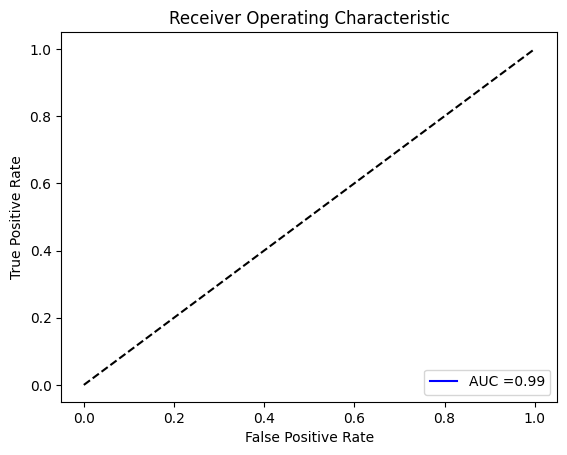

In [ ]:
# Plot ROC Curve

# Compute the False Positive Rate (FPR), True Positive Rate (TPR), and threshold values
# The ROC curve helps evaluate the classification model's performance
fpr, tpr, threshold = roc_curve(y_test, nb_classifier.predict_proba(x_test)[:, 1], pos_label='Yes')

# Set the title of the plot
plt.title('Receiver Operating Characteristic')

# Plot the ROC curve using FPR and TPR
# The blue line represents the ROC curve
plt.plot(fpr, tpr, 'b', label='AUC =' + str(np.round(roc_auc_nb, 3)))

# Add a legend at the lower right to display the AUC score
plt.legend(loc='lower right')

# Plot a diagonal dashed line (random classifier baseline)
plt.plot([0, 1], [0, 1], 'k--')

# Label the x-axis as 'False Positive Rate'
plt.xlabel('False Positive Rate')

# Label the y-axis as 'True Positive Rate'
plt.ylabel('True Positive Rate')

# Display the ROC curve plot
plt.show()


## b) Report the value of a metric (i.e, ONE metric only) that combines information about the Precision and Sensitivity of the classifier relative to the Malignant class. Of course, do NOT only report the value of the metric but also the name of the metric.

## c) If you applied this classifier to predict the cancer status of 400 new people, how many of them do you expect the classifier to classify incorrectly? Justify by showing your work.